In [1]:
import sqlite3
import numpy as np
con = sqlite3.connect('db.sqlite3')
cur = con.cursor()

In [2]:
data = cur.execute('SELECT * FROM stock_stock_price WHERE id <= 50')
alist = cur.fetchall()
data_1 = np.array(alist)

In [3]:
data_1[:,4]

array(['68.0', '70.5', '75.0', '76.0', '80.0', '80.0', '82.5', '82.0',
       '87.0', '87.0', '88.0', '85.5', '85.5', '86.0', '83.0', '80.5',
       '84.0', '84.5', '85.0', '84.5', '84.0', '81.0', '79.5', '82.0',
       '80.0', '81.0', '82.0', '81.0', '80.0', '79.0', '84.0', '85.5',
       '83.5', '87.5', '87.5', '88.5', '87.5', '85.0', '86.0', '84.5',
       '85.5', '86.5', '88.0', '88.0', '90.0', '89.5', '91.5', '97.5',
       '100.0', '105.0'], dtype='<U32')

In [4]:
x = data_1[:,4].astype('float64')
x

array([ 68. ,  70.5,  75. ,  76. ,  80. ,  80. ,  82.5,  82. ,  87. ,
        87. ,  88. ,  85.5,  85.5,  86. ,  83. ,  80.5,  84. ,  84.5,
        85. ,  84.5,  84. ,  81. ,  79.5,  82. ,  80. ,  81. ,  82. ,
        81. ,  80. ,  79. ,  84. ,  85.5,  83.5,  87.5,  87.5,  88.5,
        87.5,  85. ,  86. ,  84.5,  85.5,  86.5,  88. ,  88. ,  90. ,
        89.5,  91.5,  97.5, 100. , 105. ])

In [8]:
cur.execute('SELECT * FROM stock_stock_price WHERE id > 1 AND id <=51')
alist_y = cur.fetchall()
data_2 = np.array(alist_y)
y = data_2[:,4].astype('float64')
y

array([ 70.5,  75. ,  76. ,  80. ,  80. ,  82.5,  82. ,  87. ,  87. ,
        88. ,  85.5,  85.5,  86. ,  83. ,  80.5,  84. ,  84.5,  85. ,
        84.5,  84. ,  81. ,  79.5,  82. ,  80. ,  81. ,  82. ,  81. ,
        80. ,  79. ,  84. ,  85.5,  83.5,  87.5,  87.5,  88.5,  87.5,
        85. ,  86. ,  84.5,  85.5,  86.5,  88. ,  88. ,  90. ,  89.5,
        91.5,  97.5, 100. , 105. , 109. ])

In [12]:
# for i in range(50):
#     print("i -> X:{} \t\t Y:{}".format(x[i], y[i]))

Text(0, 0.5, 'y')

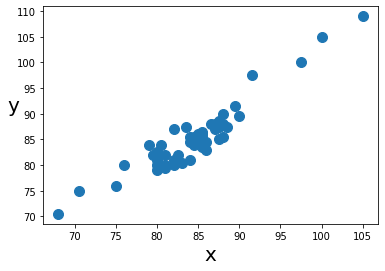

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=100)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20,rotation=0)

In [18]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [21]:
LR_model.fit(x[:,np.newaxis],y)
#| Training   60%  | valation 10% | Test 30% |
#| Training   80%  | valation 10% | Test 10% |
#| Training   60%  | valation 20% | Test 20% |
# Training > Test > valation

LinearRegression()

In [23]:
print('intercept:',LR_model.intercept_)
print('coefficient:',LR_model.coef_)

intercept: 0.013317422434340642
coefficient: [1.00954654]


Text(0, 0.5, 'y')

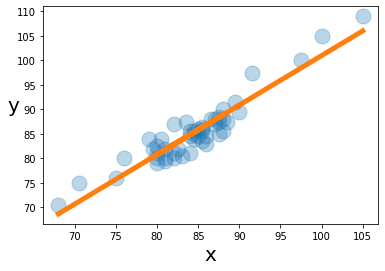

In [25]:
plt.plot(x,y,'o',markersize=15,alpha=0.3)
plt.plot(x,LR_model.intercept_+LR_model.coef_*x,linewidth=5)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20,rotation=0)

In [31]:
LR_model.predict([[90.3]])

array([91.17536993])

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [52]:
PLR_model = PolynomialRegression(degree=100).fit(x[:,np.newaxis],y)
ypred = PLR_model.predict(x[:,np.newaxis])

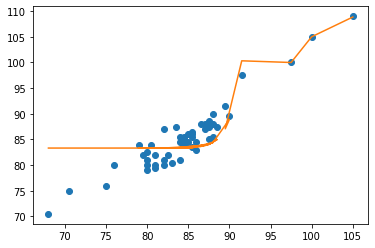

In [53]:
plt.plot(x,y,'o')
plt.plot(x,ypred)

In [59]:
PLR_model.predict([[72]])

array([83.32723039])

In [61]:
import joblib
joblib.dump(PLR_model, 'PLR_model.pkl')

['PLR_model.pkl']